<a href="https://colab.research.google.com/github/unburied/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import math

def mvs(x):
  BESSEL = len(x) - 1
  
  mean = round((sum(x) / len(x)), 2)

  var = []
  for val in x:
    var.append((val - mean) ** 2)
  var = round((sum(var) / BESSEL), 2) 
  
  std = round(math.sqrt(var), 2)
  
  stats = {'Mean': mean, 'Variance': var, 'Standard Deviation': std}
  
  return stats

In [2]:
amounts = [3505,2400,3027,2798,3700,3250,2689]

mvs(amounts)

{'Mean': 3052.71, 'Standard Deviation': 463.02, 'Variance': 214387.9}

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
def cov(x,y):
  BESSEL = len(x) - 1
  
  x_bar = mvs(x)['Mean'] 
  y_bar = mvs(y)['Mean']

  X = [val - x_bar for val in x]
  Y = [val - y_bar for val in y]  
  
  XY = [X[i] * Y[i] for i in range(0, len(X))]
    
  return round(sum(XY) / BESSEL, 2)

In [4]:
customers = [127, 80, 105, 92, 120, 115, 93]

cov(amounts, customers)

7604.36

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
def corr(x, y):
  
  x_std = mvs(x)['Standard Deviation']
  y_std = mvs(y)['Standard Deviation']
  
  return round(cov(x,y) / (x_std * y_std), 2) 

In [6]:
corr(customers,amounts)

0.96

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

df = pd.read_csv(url)

In [8]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [9]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

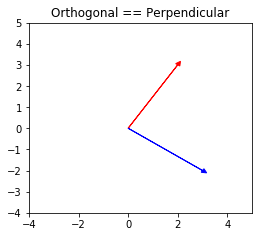

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (4,3.5))
vector_1 = np.array([2,3])
vector_2 = np.array([3,-2])

plt.arrow(0,0, vector_1[0], vector_1[1], color = 'r',
          head_width = .2, head_length = .2)
plt.arrow(0,0, vector_2[0], vector_2[1], color = 'b',
          head_width = .2, head_length = .2)

plt.xlim(-4,5)
plt.ylim(-4,5)

plt.title('Orthogonal == Perpendicular')

plt.show();

In [11]:
np.dot(vector_1,vector_2)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [12]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.dot(a,b)

-40

By definition, vectors that are orthogonal IF, AND ONLY IF, the  dot product is equal to zero. 


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [13]:
c = np.array([2, -15, 6, 20])

c_norm = np.linalg.norm(c) ** 2

c_dot = np.dot(c,c)

c_tran_c = np.matmul(np.transpose(c),c)

c_norm, c_dot, c_tran_c

(665.0, 665, 665)

These all result in the same value because a dot product is a product of 2 normalized vectors. So when the product of the same vector is computed, its the same as squaring the computation of the normalized value. The transpose is taking the product of a vector times itself, which will give the same answer as the rest.

The square of the norm of a vector is equivalent to the dot product of a vector with itself.

The dot product of a vector and itself can be rewritten as that vector times the transpose of itself.


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{equation}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\hat{i} + 12\hat{j} = 7 \begin{bmatrix} 1\\0 \end{bmatrix} + 12 \begin{bmatrix} 0\\1 \end{bmatrix} 
\end{equation}

\begin{equation}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\hat{i} + 11 \hat{j} -8 \hat{k} = 2 \begin{bmatrix} 1\\0\\0 \end{bmatrix} + 11 \begin{bmatrix} 0\\1\\0 \end{bmatrix} - 8 \begin{bmatrix} 0\\0\\1 \end{bmatrix}   
\end{equation}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [14]:
f = np.array([4,12,11,9,2])

f_norm = np.linalg.norm(f)

f_hat = f / f_norm

print(f_hat)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

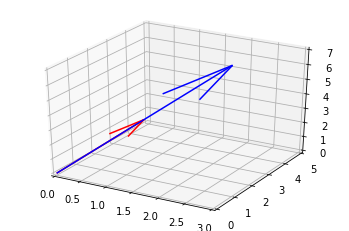

In [15]:
from mpl_toolkits.mplot3d import Axes3D

depend_a = np.array([1,2,3])
depend_b = np.array([2,4,6])

ind_a = np.array([1,5,7])
ind_b = np.array([3,11,13])

fig = plt.figure()

ax1 = fig.add_subplot(111, projection = '3d')
ax1.quiver(0,0,0,depend_a[0], depend_a[1],depend_a[2], color = 'r')
ax1.quiver(0,0,0,depend_b[0], depend_b[1],depend_b[2], color = 'b')
ax1.set_xlim(0,3)
ax1.set_ylim(0,5)
ax1.set_zlim(0,7)

plt.show();


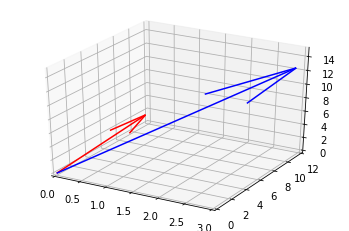

In [16]:
fig = plt.figure()


ax2 = fig.add_subplot(111, projection = '3d')
ax2.quiver(0,0,0,ind_a[0], ind_a[1],ind_a[2], color = 'r')
ax2.quiver(0,0,0,ind_b[0], ind_b[1],ind_b[2], color = 'b')
ax2.set_xlim(0,3)
ax2.set_ylim(0,12)
ax2.set_zlim(0,15)

plt.show();

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

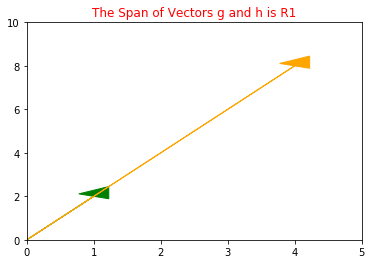

In [17]:
g = np.array([1,2])
h = np.array([4,8])

plt.arrow(0,0,g[0],g[1], color= 'green',
          head_width = .5, head_length = .5)
plt.arrow(0,0,h[0],h[1], color= 'orange',
          head_width = .5, head_length = .5)

plt.xlim(0,5)
plt.ylim(0,10)


plt.title('The Span of Vectors g and h is R1', color = 'r')
plt.show();




## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [18]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n= np.array([4,8,2])

matrix = np.array([l,m,n])

np.linalg.matrix_rank(matrix)

3

Because this matrix has a Rank of 3, we know it has 3 linearly independant vectors. We also know that a set of *n* linearly independant vectors in R<sup>n </sup>  spans R<sup>n </sup>. Therefore, we can say the span of the matrix is  R<sup>3 </sup> 

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



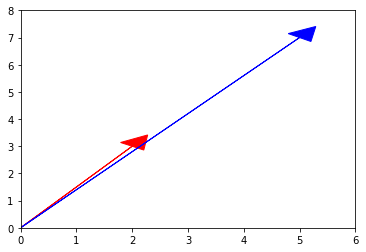

In [19]:
a_basis = np.array([2,3])
b_basis = np.array([5,7])

fig3 = plt.figure()

plt.arrow(0,0,a_basis[0], a_basis[1], color = 'r',
          head_width = .5, head_length = .5)
plt.arrow(0,0,b_basis[0], b_basis[1], color = 'b',
          head_width = .5, head_length = .5)

plt.xlim(0,6)
plt.ylim(0,8)

plt.show();

## 6.2 What does it mean to form a basis?

A basis is a vector that, through linear combinations, forms the span of its vector space. To form a basis is to determine from a set of vetors, a subset that is linearly independant and in conjuction with linear combinations, will fill the vector space of that set of vectors.  

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [20]:
P = np.array([[1,2,3], [-1,0,7], [4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of its column space. The column space forms a basis, which informs us as to the span of the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [21]:
v = np.array([1,3])
w = np.array([-1,2])
proj = (np.dot(w,v) / np.dot(v,v)) * v

proj

array([0.5, 1.5])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


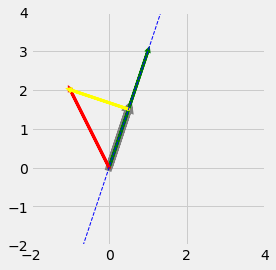

In [22]:
#Awesomize
plt.style.use('fivethirtyeight')

#Bounds
plt.xlim(-2,4)
plt.ylim(-2,4)

#yellow line
x_minus_proj = w - proj

#Get L line
axes = plt.gca()
plt.axes().set_aspect('equal')
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

#plot stuff
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=7, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

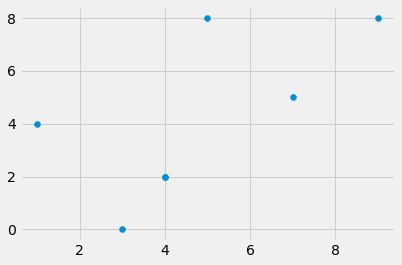

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

In [0]:
def projection(df):  
  #convert df values to array
  w = df.values
  v = np.array([df.x,df.x]).T
  
  proj = []
  #calculate the projection for each element
  for i in range(0,len(df)):
    proj.append((np.dot(w[i],v[i]) / np.dot(v[i],v[i])) * v[i])
  
  #extract and store components of projection vector    
  df['px'] = [x[0] for x in proj] 
  df['py'] = py = [y[1] for y in proj]

In [84]:
projection(df)
df.head()

,x,y,px,py
0,1,4,2.5,2.5
1,4,2,3.0,3.0
2,7,5,6.0,6.0
3,3,0,1.5,1.5
4,9,8,8.5,8.5


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


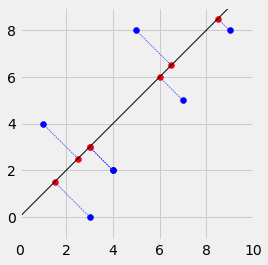

In [132]:
#Awesomize
plt.style.use('fivethirtyeight')

#Bounds
plt.xlim(df.x.min() -1 ,df.x.max() +1)
plt.ylim(df.y.min() -1 ,df.y.max() +1)

#Get L line
axes = plt.gca()
plt.axes().set_aspect('equal')
x_vals = np.array(axes.get_xlim())
y_vals = x_vals

#plot stuff
plt.plot(x_vals, y_vals, color='black', linewidth=1)
plt.scatter(df.x, df.y, color = 'blue')
plt.scatter(df.px, df.py, color = 'red')

#orthogonal intercepts
for i in range(0, len(df)):
  x = (df.px.iloc[i] , df.x.iloc[i])
  y = (df.py.iloc[i] , df.y.iloc[i])
  plt.plot(x, y, '--', linewidth = .5,color = 'blue')
  
plt.show();